# Introduction to Regression with Neural Networks in TensorFlow


In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating data to view and fit

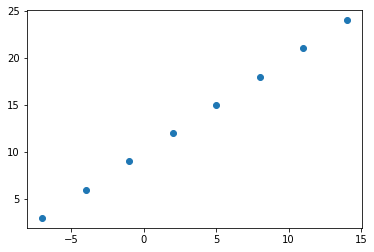

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features 
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it 
plt.scatter(X,y);

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and output shapes 

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

Metal device set to: Apple M1


2022-06-28 00:26:06.858188: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 00:26:06.862802: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

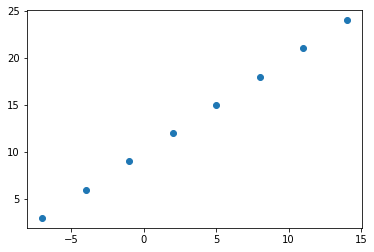

In [8]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow 

1. Creaing a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns to between X and y.


In [9]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model 
model.compile(loss=tf.keras.losses.mae, 
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5


2022-06-28 00:26:07.137458: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-28 00:26:07.568907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
 # Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 75ms/step


2022-06-28 00:26:08.542335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[12.716021]], dtype=float32)

# Improving our model

We can improve our model, by altering the steps we took to create a model.

1. Create a model - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer. 
2. Compiling a model - here we might change the optimization function or perhaps the learning rate of the optimization function 
3. fitting a model - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)

In [12]:
#Lets rebuild our model

#1. Create a model using the Sequential API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model 
model.compile(loss=tf.keras.losses.mae, 
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 129ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100


2022-06-28 00:26:08.700086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 9.8969 - mae: 9.8969
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 

1/1 [==============================] - 0s 5ms/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9263 - mae: 6.9263
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9038 - mae: 6.9038
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8981 - mae: 6.8981
Epoch 99/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8925 - mae: 6.8925
Epoch 100/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8869 - m

In [13]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 24ms/step


2022-06-28 00:26:09.390580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[29.739855]], dtype=float32)

In [14]:
#1. Create a model using the Sequential API (with extra hidden layer and 100 units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

#2. Compile the model 
model.compile(loss=tf.keras.losses.mae, 
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


2022-06-28 00:26:09.797982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 987ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 5.7205 

1/1 [==============================] - 0s 4ms/step - loss: 3.7013 - mae: 3.7013
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7505 - mae: 3.7505
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 3.6921 - mae: 3.6921
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7522 - mae: 3.7522
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 3.7016 - mae: 3.7016
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7251 - mae: 3.7251
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7105 - mae: 3.7105
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6979 - mae: 3.6979
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7194 - mae: 3.7194
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6705 - mae: 3.6705
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7299 - ma

In [15]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 153ms/step


2022-06-28 00:26:11.107993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[31.22314]], dtype=float32)

In [16]:
#1. Create a model using the Sequential API (with extra hidden layer and 100 units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

#2. Compile the model 
model.compile(loss=tf.keras.losses.mae, 
             optimizer=tf.keras.optimizers.Adam(lr=0.01),
             metrics=['mae'])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/Users/mhlaghari/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-06-28 00:26:11.430509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 608ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9052 - mae: 11.9052
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0711 - mae: 11.0711
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2556 - mae: 10.2556
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6071 - mae: 9.6071
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.9779 - mae: 8.9779
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.3323 - mae: 8.3323
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 7.6675 - mae: 7.6675
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9772 - mae: 6.9772
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.2577 - mae: 6.2577
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 5.5047 -

1/1 [==============================] - 0s 5ms/step - loss: 0.1633 - mae: 0.1633
Epoch 90/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1497 - mae: 0.1497
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2269 - mae: 0.2269
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1987 - mae: 0.1987
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2866 - mae: 0.2866
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2692 - mae: 0.2692
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3803 - mae: 0.3803
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3506 - mae: 0.3506
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1934 - mae: 0.1934
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4458 - mae: 0.4458
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4780 - ma

In [17]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 28ms/step


2022-06-28 00:26:12.596532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[26.436134]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is: 

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation ... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

it's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model = how do the predictions of a model line up against the ground truth (the original labels)

In [18]:
# make a bigger dataset 
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# make labels for the dataset 
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

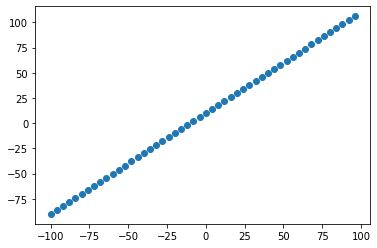

In [20]:
# visualize the data 
plt.scatter(X, y)

###  The 3 sets...

* Training set - the model learn from this data (70-80%)
* Validation set - the model gets tuned on this data (10-15%)
* Test set - the model gets evaluated on this data (10-15%)

In [21]:
#Check the length of sameples 
len(X)

50

In [22]:
# Split the data into train and test sets 
X_train = X[:40]
y_train = y[:40]


X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data 

Now we're got our data in training and test sets... lets visual it again!

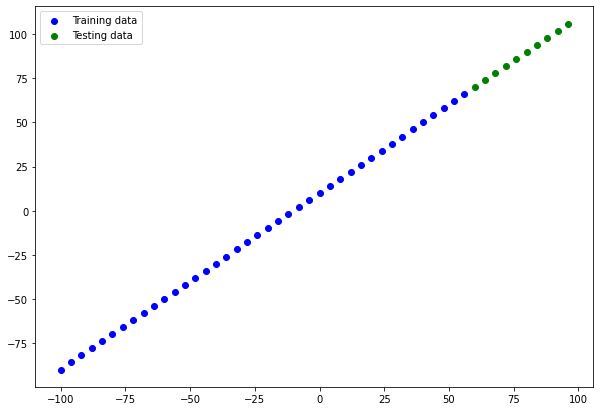

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Training data')

plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend();

In [24]:
# Lets have a look at how to build a neural network for data 

#1. Create a model using the Sequential API (with extra hidden layer and 100 units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model 
model.compile(loss='mae', 
             optimizer='SGD',
             metrics=['mae'])

#3. fit the model
#model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [25]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [27]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [28]:
#1. Create a model using the Sequential API (with extra hidden layer and 100 units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#2. Compile the model 
model.compile(loss='mae', 
             optimizer='SGD',
             metrics=['mae'])



In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model 
* Trainable params - these are the parameters (patterns) the model can update as it trains 
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning** )

**Watch MITs introduction to deep learning video**

In [30]:
model.fit(X_train, y_train, epochs=100, verbose=0)

2022-06-28 00:26:27.372910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [31]:
# Lets have a look at how to build a neural network for data 

#1. Create a model using the Sequential API (with extra hidden layer and 100 units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1])
])

#2. Compile the model 
model.compile(loss='mae', 
             optimizer='SGD',
             metrics=['mae'])

In [32]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [33]:
#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

2022-06-28 00:26:28.168085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [34]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [36]:
# Lets have a look at how to build a neural network for data 

#1. Create a model using the Sequential API (with extra hidden layer and 100 units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1,name='output_layer')
], name='model_1')

#2. Compile the model 
model.compile(loss='mae', 
             optimizer='SGD',
             metrics=['mae'])

In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [38]:
#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

2022-06-28 00:26:29.365729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


### Visualizing our models predictions 

In [39]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 25ms/step


2022-06-28 00:26:30.268539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[ 72.40546 ],
       [ 77.11942 ],
       [ 81.8334  ],
       [ 86.54737 ],
       [ 91.26133 ],
       [ 95.9753  ],
       [100.68928 ],
       [105.403244],
       [110.11722 ],
       [114.83119 ]], dtype=float32)

In [40]:
#Lets create a plotting function 
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    '''
    Plots training and testing data and compares predicitions to ground truth labels
    '''
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')

    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend();

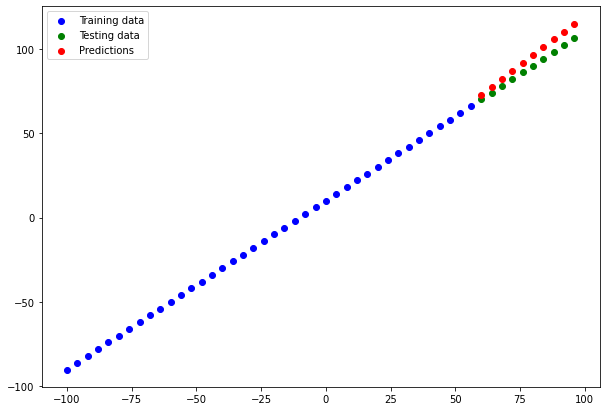

In [41]:
plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred)

### Evaluating our models predictions with regression evaluation metrics

In [42]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 85ms/step - loss: 5.6183 - mae: 5.6183


2022-06-28 00:26:30.431089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[5.618321418762207, 5.618321418762207]

In [43]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.075636, 12.928347, 10.866641, 10.      , 10.252266, 11.590121,
       14.013567, 17.522596, 22.117218, 26.831192], dtype=float32)>

In [44]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=5.6183214>

In [45]:
#Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=35.771004>

In [73]:
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_test, 
                            y_pred=tf.squeeze(y_pred))

    

In [74]:

def mae(y_true, y_pred):    
    return tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred))

In [75]:
mse(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=35.771004>

In [76]:
mae(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=5.6183214>

### Running experiments to improve our model

1. get more data 
2. Make your model larger (using a more complex model) - more layers, hidden units
3. train for longer

Lets do 3 modelling experiments:

1. `model_1` 1 layer, trained for 100 epochs 
2. `model 2` 2 layers, trained for 100 epochs
3. `model 3` 2 layers, trained for 500 epochs

In [79]:
#set random seed 
tf.random.set_seed(42)

#1. create the model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile the model 
model_1.compile(loss='mae',
               optimizer='SGD',
               metrics=['mae'])

#3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 16ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - 

2022-06-28 01:09:24.768415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 5ms/step - loss: 9.7977 - mae: 9.7977
Epoch 14/100
2/2 [==============================] - 0s 4ms/step - loss: 16.0103 - mae: 16.0103
Epoch 15/100
2/2 [==============================] - 0s 6ms/step - loss: 11.4068 - mae: 11.4068
Epoch 16/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5393 - mae: 8.5393
Epoch 17/100
2/2 [==============================] - 0s 4ms/step - loss: 13.6348 - mae: 13.6348
Epoch 18/100
2/2 [==============================] - 0s 4ms/step - loss: 11.4629 - mae: 11.4629
Epoch 19/100
2/2 [==============================] - 0s 4ms/step - loss: 17.9148 - mae: 17.9148
Epoch 20/100
2/2 [==============================] - 0s 4ms/step - loss: 15.0494 - mae: 15.0494
Epoch 21/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0216 - mae: 11.0216
Epoch 22/100
2/2 [==============================] - 0s 5ms/step - loss: 8.1558 - mae: 8.1558
Epoch 23/100
2/2 [==============================] - 0s 3ms/step - los

2/2 [==============================] - 0s 4ms/step - loss: 8.7067 - mae: 8.7067


1/1 [==============================] - 0s 37ms/step


2022-06-28 01:09:28.370012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


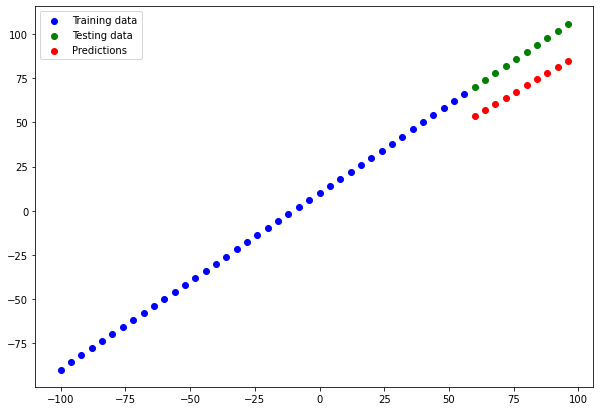

In [80]:
#make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [81]:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745329>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [82]:
# model_2

#set random seed 
tf.random.set_seed(42)

#1. create the model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model 
model_2.compile(loss='mae',
               optimizer='SGD',
               metrics=['mae'])

#3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

2022-06-28 01:09:34.118355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 38ms/step


2022-06-28 01:09:56.520351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


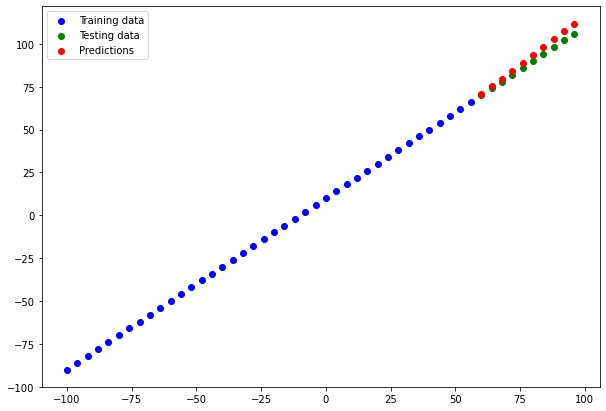

In [83]:
#make and plot predictions for model_1
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [84]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.196933>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070086>)

In [85]:
# model_2

#set random seed 
tf.random.set_seed(42)

#1. create the model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model 
model_3.compile(loss='mae',
               optimizer='SGD',
               metrics=['mae'])

#3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

2022-06-28 01:12:27.734319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 33ms/step


2022-06-28 01:12:50.645350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


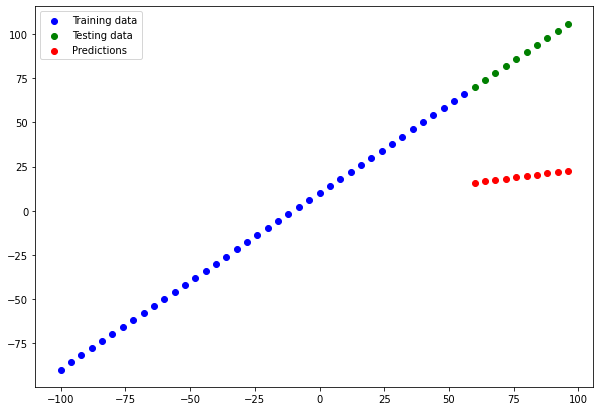

In [87]:
#make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [88]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.029>)

### Comparing the results 

In [92]:
# lets compare our models results using a pandas dataframe
import pandas as pd 

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,18.745329,353.573364
1,model_2,3.196933,13.070086
2,model_3,68.713615,4808.028809


In [93]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Save our models 
1. the savedmodel format
2. the HDF5 format

In [94]:
model_2.save('bestModel_saveModelFormat')

INFO:tensorflow:Assets written to: bestModel_saveModelFormat/assets


In [95]:
model_2.save('bestModel_saveModelFormat_HDF5.h5')

## Load our models and test again

In [96]:
#load in the saved modelformat
loaded_SavedModel_format = tf.keras.models.load_model('/Users/mhlaghari/Documents/Documents/MyProjects/Tensorflow/bestModel_saveModelFormat')

In [97]:
loaded_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [98]:
model_2_preds = model_2.predict(X_test)
lsmf_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == lsmf_preds

1/1 [==============================] - 0s 35ms/step


2022-06-28 01:39:17.063525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [99]:
# loading h5 model
loaded_h5_model = tf.keras.models.load_model('bestModel_saveModelFormat_HDF5.h5')

In [100]:
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [101]:
h5_preds = loaded_h5_model.predict(X_test)
model_2_preds == h5_preds

1/1 [==============================] - 0s 44ms/step


2022-06-28 01:41:04.790118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A larger example 

In [103]:
import matplotlib.pyplot as plt

In [104]:
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [105]:
# One hot encoding
insurance_ohe = pd.get_dummies(insurance)
insurance_ohe.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [106]:
X = insurance_ohe.drop('charges', axis=1)
y = insurance_ohe['charges']

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
#Build a nn like model 2

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = 'mae',
                   optimizer='SGD',
                       metrics = ['mae'])

insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

2022-06-28 19:34:57.342004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [112]:
#Check the results of the insurance model on the test model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7076.7925 - mae: 7076.7925


2022-06-28 19:36:14.169832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[7076.79248046875, 7076.79248046875]

In [113]:
y_train.median() , y_train.mean()

(9575.4421, 13346.089736364489)

### Improve the model

In [117]:
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = 'mae',
                   optimizer='Adam',
                       metrics = ['mae'])

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

2022-06-28 19:42:00.293916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [118]:
#Check the results of the insurance model on the test model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 1s 4ms/step - loss: 4813.8896 - mae: 4813.8896


2022-06-28 19:42:12.477359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[4813.8896484375, 4813.8896484375]

In [130]:
%%time
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = 'mae',
                   optimizer='Adam',
                       metrics = ['mae'])

history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

2022-06-28 19:51:13.813431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


CPU times: user 19 s, sys: 8.74 s, total: 27.7 s
Wall time: 23.2 s


In [131]:
#Check the results of the insurance model on the test model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3491.8232 - mae: 3491.8232


2022-06-28 19:51:36.805492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[3491.8232421875, 3491.8232421875]

Text(0.5, 0, 'epochs')

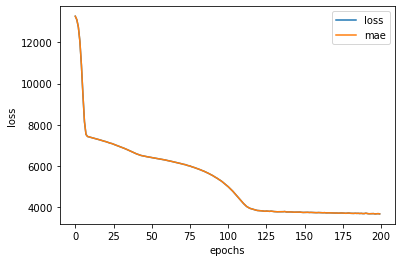

In [132]:
#Plot history (aka loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

> **Question** How long should you train for?

Depends on the problem you're working on. However, TensorFlow has a solution! It's called [EarlyStoppingCallback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow Component you can add to your model to stop training once it stops improving a certain metrics

## Preprocessing data (normalization and standardization)

In [133]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']), 
    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region'])
)

# Create X and Y
X = insurance.drop('charges',axis = 1)
y = insurance['charges']

# Train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and (OHE)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [135]:
#what does our data look like 
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [136]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [137]:
tf.random.set_seed(42)

insurance_model_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_normal.compile(loss = 'mae',
                   optimizer='Adam',
                       metrics = ['mae'])

history = insurance_model_normal.fit(X_train_normal, y_train, epochs=100, verbose=0)

2022-06-28 23:27:03.151925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [138]:
#Check the results of the insurance model on the test model
insurance_model_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 3438.7864 - mae: 3438.7864


2022-06-28 23:27:31.451944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[3438.786376953125, 3438.786376953125]

Text(0.5, 0, 'epochs')

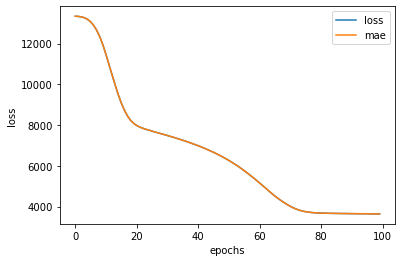

In [139]:
#Plot history (aka loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')